<div style="background-color: lightblue; padding: 40px;">
    <h1><b>Working With Time Series in Pandas</b></h1>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from vega_datasets import data
import datetime

# First Part

## Seatle Weather

In [2]:
# Acquire the data
sf_temps = data.sf_temps()
sf_temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# Make date the index and sort

sf_temps = sf_temps.set_index('date').sort_index()

In [5]:
# Check if its done correctly
type(sf_temps.index)


pandas.core.indexes.datetimes.DatetimeIndex

# Use the above dataset for the following exercises:

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [9]:
# Resample by the day and take the average temperature
average_temp_by_day = sf_temps.resample('D').mean().head(3)
average_temp_by_day

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39


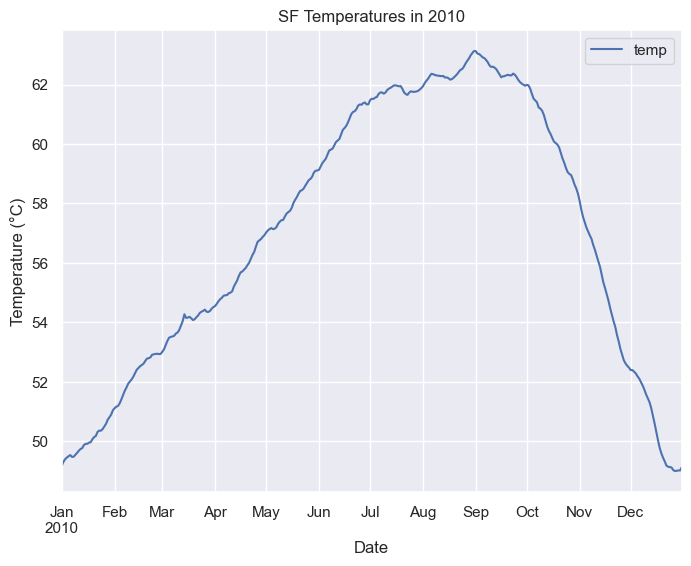

In [10]:
# Visualize the average temperature over time
sf_temps.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()



## 2. Write the code necessary to visualize the minimum temperature over time.


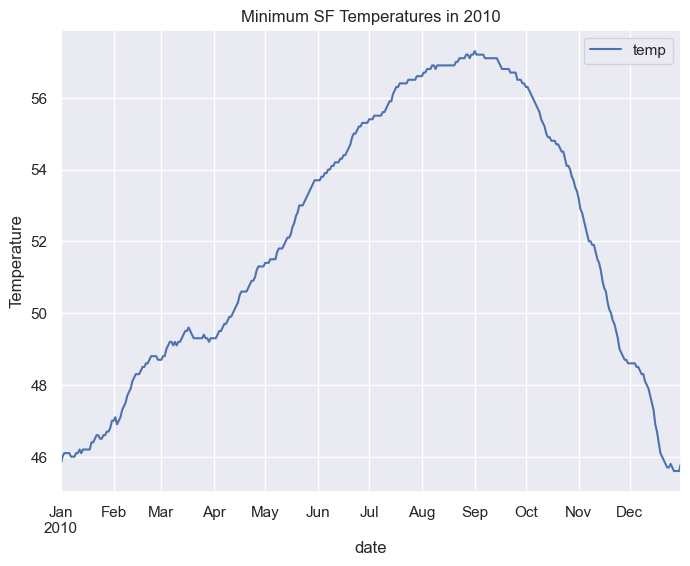

In [11]:
# Plot the min temps

sf_temps.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

## 3. Write the code necessary to visualize the maximum temperature over time.


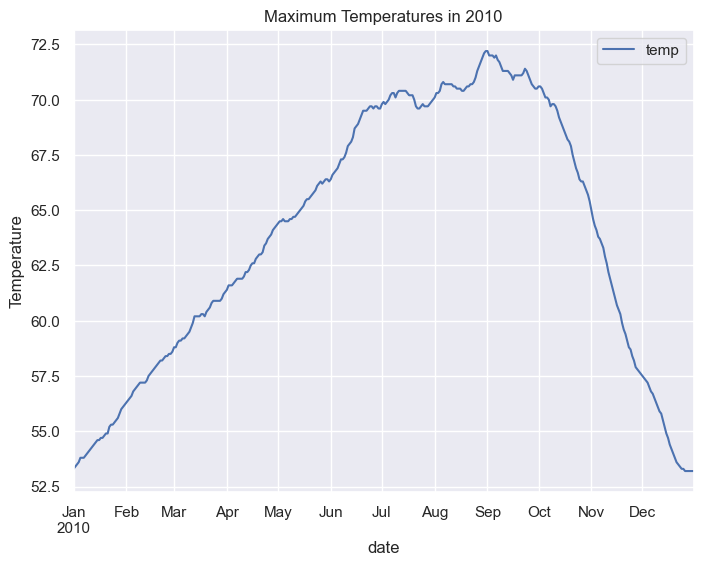

In [12]:
# Plot the max temps

sf_temps.resample('D').max().plot()
plt.title('Maximum Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

## 4. Which month is the coldest, on average?


In [14]:
# Resampling by month,get average, sort those values
sf_temps.temp.resample('M').mean().sort_values()


date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

In [15]:
average_temps = sf_temps.resample('M').mean()


In [16]:
average_temps.min()


temp   49.98
dtype: float64

In [ ]:
# OR

In [43]:
#create a column for month
sf_temps['month'] = sf_temps.index.month


In [44]:
sf_temps.groupby(sf_temps.index.month_name()).mean().idxmin()


temp     January
month    January
dtype: object

In [45]:
 sf_temps.groupby('month')['temp'].mean().min()


49.98413978494623

## 5. Which month has the highest average temperature?


In [47]:
#resample by month, get average temp,sort desc
sf_temps.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

In [48]:
average_temps.max()


temp   62.49
dtype: float64

In [ ]:
# OR

In [49]:
sf_temps.groupby(sf_temps.index.month_name()).mean().idxmax()


temp     September
month     December
dtype: object

In [50]:
sf_temps.groupby('month').mean().max()


temp   62.49
dtype: float64

answer: September (2010-09-30)


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [51]:
#resample temps by day- add min max columns
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [52]:
daily_temps

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


In [53]:
#create column that shows the temp difference between min and max
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [54]:
#make sure new column was created
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70
...,...,...,...
2010-12-27,45.60,53.20,7.60
2010-12-28,45.60,53.20,7.60
2010-12-29,45.60,53.20,7.60


In [55]:
#sort the values to see temp difference to answer question
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31   15.00
2010-09-30   14.90
2010-06-30   14.80
2010-07-31   14.80
2010-10-31   14.40
2010-05-31   13.10
2010-04-30   13.00
2010-03-31   12.00
2010-11-30   11.80
2010-02-28    9.90
2010-01-31    9.30
2010-12-31    8.90
Name: temp_diff, dtype: float64

Answer: August (2010-08-31) with 15.00 degrees


## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


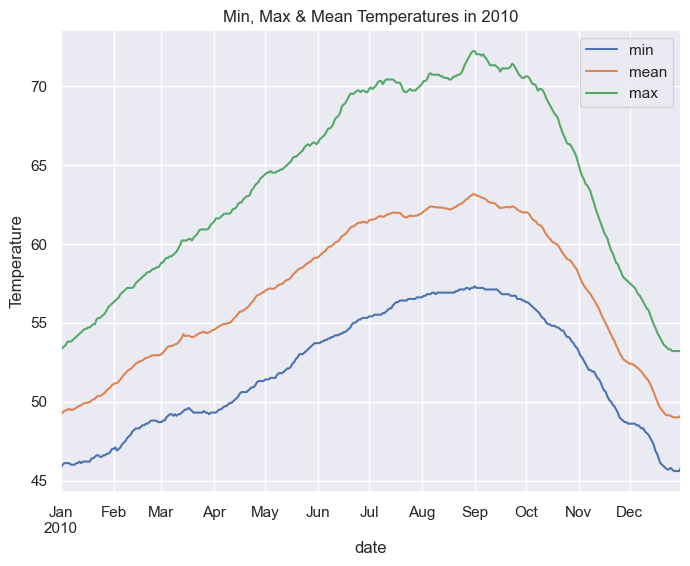

In [56]:
#resample temperatures by day- get min max and average
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

# Second Part

## Seattle Data

In [57]:
# import seattle data
# Load the Seattle weather dataset
seattle_weather = data.seattle_weather()
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [58]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [60]:
#check the index- should be date
type(seattle_weather.index)

#it is not, must change that

pandas.core.indexes.range.RangeIndex

In [62]:
seattle_weather= seattle_weather.set_index('date').sort_index()

In [63]:
#make sure index was reset
type(seattle_weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Use the above dataset for the following exercises:


## 1. Which year and month combination has the highest amount of precipitation?

In [65]:
seattle_weather.precipitation.resample('M').mean().sort_values(ascending=False)


date
2015-12-31   9.18
2014-03-31   7.74
2015-11-30   7.09
2012-11-30   7.02
2012-03-31   5.90
2012-12-31   5.61
2012-01-31   5.59
2014-02-28   5.54
2014-10-31   5.53
2012-10-31   5.49
2013-09-30   5.23
2013-04-30   4.99
2015-02-28   4.79
2014-11-30   4.10
2015-10-31   3.95
2014-12-31   3.93
2015-03-31   3.66
2014-04-30   3.54
2013-01-31   3.41
2013-11-30   3.21
2012-02-29   3.18
2014-01-31   3.03
2015-01-31   3.00
2015-08-31   2.69
2014-05-31   2.58
2012-06-30   2.50
2012-04-30   2.27
2013-03-31   2.25
2013-05-31   1.95
2014-09-30   1.89
2015-04-30   1.72
2012-05-31   1.68
2014-08-31   1.48
2013-02-28   1.44
2013-12-31   1.37
2013-10-31   1.26
2013-08-31   1.11
2013-06-30   1.10
2012-07-31   0.85
2015-09-30   0.70
2014-07-31   0.63
2014-06-30   0.63
2015-05-31   0.48
2015-06-30   0.20
2015-07-31   0.07
2012-09-30   0.03
2013-07-31   0.00
2012-08-31   0.00
Name: precipitation, dtype: float64

In [66]:
seattle_weather.precipitation.max()

55.9

In [67]:
seattle_weather.precipitation.sort_values(ascending=False)


date
2015-03-15   55.90
2015-12-08   54.10
2012-11-19   54.10
2015-11-14   47.20
2014-03-05   46.70
              ... 
2013-10-13    0.00
2013-10-14    0.00
2013-10-15    0.00
2013-10-16    0.00
2015-12-31    0.00
Name: precipitation, Length: 1461, dtype: float64

Answer: March 2015


## 2. Visualize the amount of monthly precipitation over time.

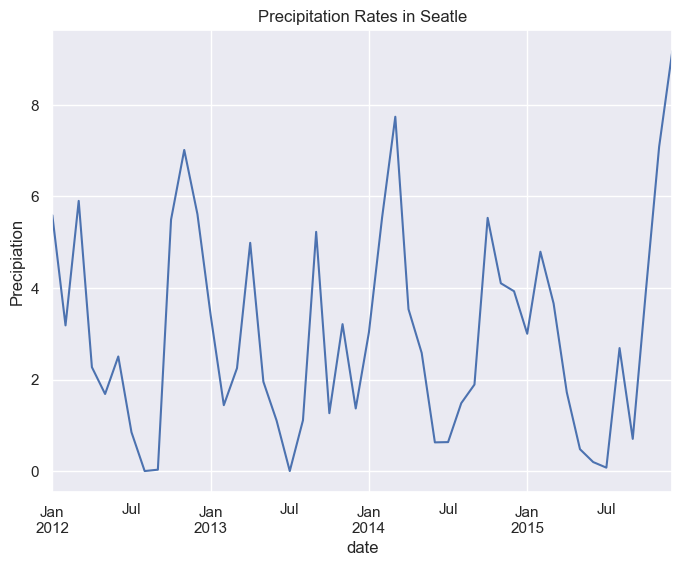

In [69]:
seattle_weather.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seatle')
plt.ylabel('Precipiation')
plt.show()

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


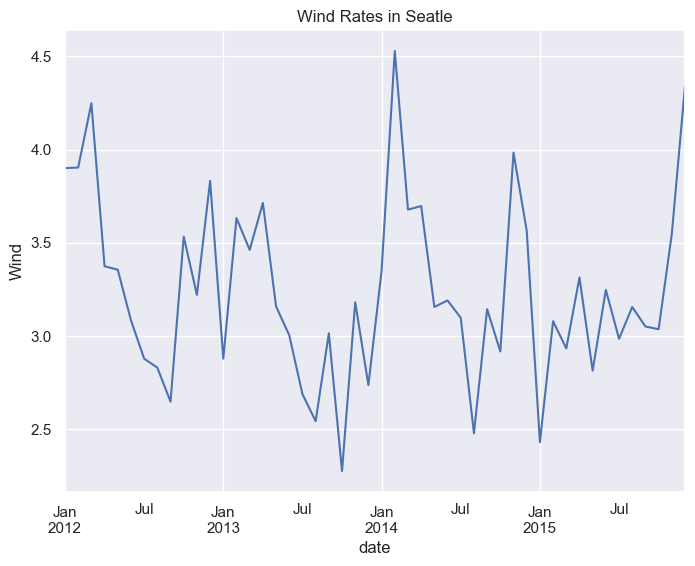

In [70]:
# Visualize the amount of wind 
seattle_weather.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seatle')
plt.ylabel('Wind')
plt.show()


## 4. Which year-month combination is the windiest?


In [72]:
seattle_weather.wind.sort_values(ascending=False)


date
2012-12-17   9.50
2014-01-11   8.80
2013-12-01   8.80
2012-01-21   8.20
2014-01-12   8.10
             ... 
2013-01-22   0.60
2013-11-25   0.50
2015-01-10   0.50
2013-12-26   0.50
2013-10-23   0.40
Name: wind, Length: 1461, dtype: float64

Answer: December 2012 (2012-12-17) with 9.50


## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [73]:


#take a look at weather types
seattle_weather.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:

#see the counts for each type
seattle_weather.weather.value_counts()

In [74]:

#create a column for days that are sunny
seattle_weather['sunny_day'] = seattle_weather.weather == 'sun'

In [75]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [76]:
#resample by year to answer question
seattle_weather.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

In [77]:
#can also look at average
seattle_weather.sunny_day.resample('Y').mean().sort_values(ascending=False)

date
2014-12-31   0.58
2013-12-31   0.56
2015-12-31   0.49
2012-12-31   0.32
Name: sunny_day, dtype: float64

## 6. In which month does it rain the most?


In [78]:
#create a column for days that are sunny
seattle_weather['rainy_day'] = seattle_weather.weather == 'rain'

In [79]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True


In [80]:

#create column to identify month!
seattle_weather['month'] = seattle_weather.index.month

In [81]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True,1


In [82]:
#resample by month to answer question
#this only gives me monthly totals individuals
seattle_weather.rainy_day.resample('M').sum().sort_values(ascending=False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
2012-05-31    16
2012-07-31    12
2012-09-30     4
2012-08-31     2
2015-08-31     2
2013-10-31     1
2014-08-31     1
2014-07-31     1
2015-01-31     1
2015-04-30     1
2014-10-31     1
2013-08-31     1
2013-07-31     1
2015-10-31     1
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-11-30     0
2015-11-30     0
2014-12-31     0
2015-09-30     0
2014-01-31     0
2014-09-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2013-12-31     0
2013-11-30     0
2013-09-30     0
2013-06-30     0
2013-05-31     0
2013-04-30     0
2015-12-31     0
Name: rainy_day, dtype: int64

In [83]:

#by month... descending precipiation amounts
seattle_weather.groupby('month').precipitation.sum().sort_values(ascending=False)

#November had 642.5 days of rain between 2012 and 2015

month
11   642.50
12   622.70
3    606.20
10   503.40
1    466.00
2    422.00
4    375.40
9    235.50
5    207.50
8    163.70
6    132.90
7     48.20
Name: precipitation, dtype: float64

Answer: November (11) with 642.50 precipitation


## 7. Which month has the most number of days with a non-zero amount of precipitation?


In [85]:
seattle_weather.groupby('month').rainy_day.mean().sort_values(ascending=False)


month
2    0.35
3    0.30
1    0.28
11   0.21
12   0.19
4    0.17
10   0.16
6    0.16
5    0.13
7    0.11
8    0.05
9    0.03
Name: rainy_day, dtype: float64

In [86]:

## Can also use precipitation
seattle_weather['precip_amnt'] = seattle_weather.precipitation > 0

In [87]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month,precip_amnt
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True,1,True


In [88]:
seattle_weather.groupby('month').precip_amnt.mean().sort_values(ascending=False)


month
12   0.65
2    0.65
11   0.59
3    0.59
1    0.53
10   0.49
4    0.49
6    0.31
9    0.29
5    0.27
8    0.18
7    0.09
Name: precip_amnt, dtype: float64

# Flight Exercises:


In [89]:
# Load the flights_20k dataset
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [90]:
#check dtypes
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [91]:
#check the index- should be date
type(flights.index)

pandas.core.indexes.range.RangeIndex

In [92]:
#must complete step 2&3 (set date as index and sort)
flights = flights.set_index('date').sort_index()

In [93]:
#confirm the change
type(flights.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Third Part


## Use the above dataset for the following exercises:

## 1. Convert any negative delays to 0.

In [94]:
flights['neg_delay'] = flights.delay < 0


In [95]:
#turn all neg values into 0
flights['delay'] = flights['delay'].apply(lambda x : x if x > 0 else 0)

In [96]:
#make sure it worked
flights

,delay,distance,origin,destination,neg_delay
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False
2001-01-01 06:20:00,0,491,BNA,MCI,False
2001-01-01 06:30:00,0,251,MDW,STL,True
2001-01-01 07:00:00,0,361,OAK,ONT,True
2001-01-01 07:00:00,0,303,MSY,HOU,False
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,False
2001-03-31 21:05:00,0,318,FLL,JAX,True
2001-03-31 21:05:00,0,451,MCI,IND,True


In [97]:
#should not be any negative values
flights.delay.min()

0

## 2. Which hour of the day has the highest average delay?


In [98]:
#resample by the hour, get average delay time
flights.resample('H').delay.mean()

date
2001-01-01 00:00:00   14.00
2001-01-01 01:00:00     NaN
2001-01-01 02:00:00     NaN
2001-01-01 03:00:00     NaN
2001-01-01 04:00:00     NaN
                       ... 
2001-03-31 17:00:00   11.67
2001-03-31 18:00:00   12.54
2001-03-31 19:00:00   22.12
2001-03-31 20:00:00   27.60
2001-03-31 21:00:00   11.20
Freq: H, Name: delay, Length: 2158, dtype: float64

In [99]:
#create column that shows what hour the time is in
flights['hour'] = flights.index.hour

In [100]:
#make sure column for hour was created
flights

,delay,distance,origin,destination,neg_delay,hour
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,0
2001-01-01 06:20:00,0,491,BNA,MCI,False,6
2001-01-01 06:30:00,0,251,MDW,STL,True,6
2001-01-01 07:00:00,0,361,OAK,ONT,True,7
2001-01-01 07:00:00,0,303,MSY,HOU,False,7
...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,False,21
2001-03-31 21:05:00,0,318,FLL,JAX,True,21
2001-03-31 21:05:00,0,451,MCI,IND,True,21


In [101]:
#by hour- find delays descending
flights.groupby('hour').delay.sum().sort_values(ascending=False)

#hour 20 has most delays

hour
20    20126
21    19875
19    19833
17    18849
18    18375
16    17157
15    16041
14    14036
13    13492
22    12068
12    11951
11     9062
10     6752
9      5993
8      5421
7      4356
23     4248
6      2425
0      1535
3       605
1       170
5        19
Name: delay, dtype: int64

Answer: 8pm (20) with 20126 minutes of delay


## 3. Does the day of the week make a difference in the delay amount?


In [102]:
flights.resample('D').delay.mean()


date
2001-01-01    8.75
2001-01-02   21.81
2001-01-03   17.15
2001-01-04    7.18
2001-01-05    9.29
              ... 
2001-03-27    4.67
2001-03-28    3.55
2001-03-29   13.55
2001-03-30    8.89
2001-03-31    7.00
Freq: D, Name: delay, Length: 90, dtype: float64

In [104]:
flights['day'] = flights.index.day_name()
flights

,delay,distance,origin,destination,neg_delay,hour,day
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,False,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,True,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,True,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,False,7,Monday
...,...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,False,21,Saturday
2001-03-31 21:05:00,0,318,FLL,JAX,True,21,Saturday
2001-03-31 21:05:00,0,451,MCI,IND,True,21,Saturday


In [105]:
weekday_delay = flights.groupby('day').delay.mean().sort_values(ascending=False)
weekday_delay

day
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Saturday     8.43
Monday       7.17
Name: delay, dtype: float64

In [106]:
#see what days have what number of delays
flights.day.value_counts()

day
Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: count, dtype: int64

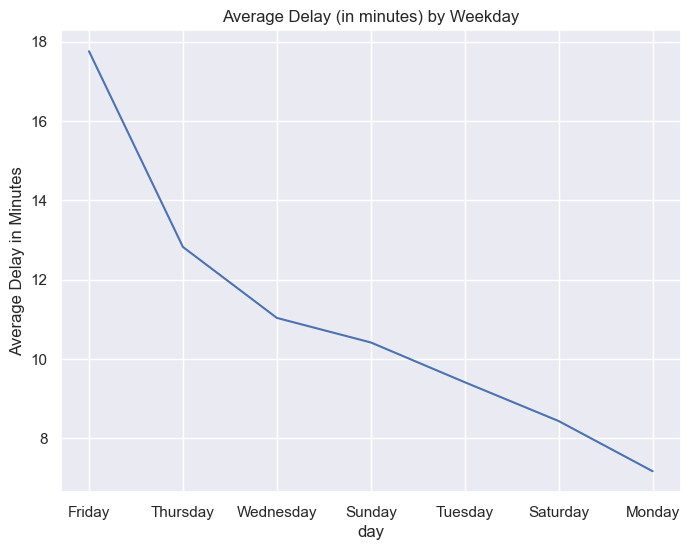

In [107]:
weekday_delay.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

## 4. Does the month make a difference in the delay amount?

In [109]:
#create a column for month
flights['month'] = flights.index.month_name()
flights

,delay,distance,origin,destination,neg_delay,hour,day,month
date,,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,False,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,True,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,True,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,False,7,Monday,January
...,...,...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,False,21,Saturday,March
2001-03-31 21:05:00,0,318,FLL,JAX,True,21,Saturday,March
2001-03-31 21:05:00,0,451,MCI,IND,True,21,Saturday,March


In [110]:
#see average minutes of delay by month
monthly_delay = flights.groupby('month').delay.mean()
monthly_delay

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

In [111]:
#see how many delays are in each month
flights.month.value_counts()

month
March       6960
January     6784
February    6256
Name: count, dtype: int64

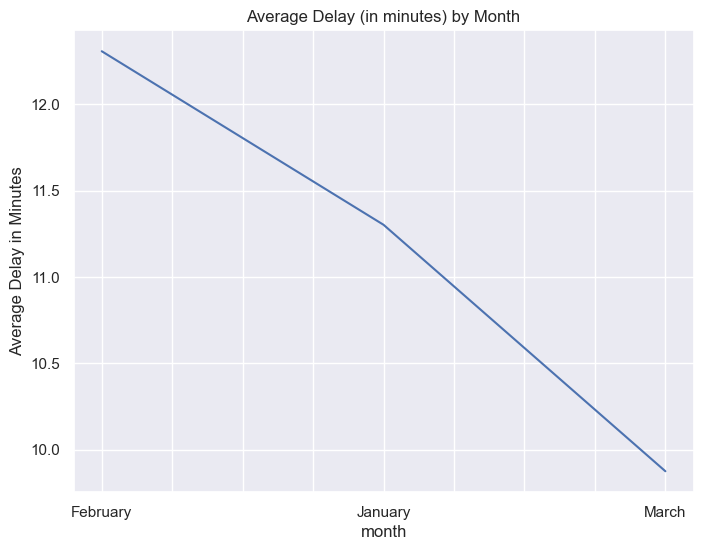

In [112]:
monthly_delay.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()


# Bonus

In [113]:
iowa = data.iowa_electricity()


 - For each row, calculate the percentage of the year's total that energy source provided.
 - Lineplot of generation over time, color by source
 - Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
 - Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
 - Is the total generation increasing over time?
 - How would you control for increasing consumption over time when considering how much energy is coming from each source?
 - express each number as a % of the year's total

In [114]:
#check dtype
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [115]:
#check index, make sure its set to year
type(iowa.index)

pandas.core.indexes.range.RangeIndex

In [116]:
#must complete step 2&3 (set date as index and sort)
iowa = iowa.set_index('year').sort_index()

In [117]:
#confirm index is changed
type(iowa.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [118]:
iowa.tail()


,source,net_generation
year,,
2016-01-01,Fossil Fuels,28437
2016-01-01,Nuclear Energy,4703
2017-01-01,Fossil Fuels,29329
2017-01-01,Nuclear Energy,5214
2017-01-01,Renewables,21933


## 1 For each row, calculate the percentage of the year's total that energy source provided.

In [119]:
#create column for year only
iowa['number_year'] = iowa.index.year

In [120]:
#make sure column was created
iowa.head()

,source,net_generation,number_year
year,,,
2001-01-01,Fossil Fuels,35361,2001
2001-01-01,Nuclear Energy,3853,2001
2001-01-01,Renewables,1437,2001
2002-01-01,Fossil Fuels,35991,2002
2002-01-01,Nuclear Energy,4574,2002


In [121]:
#this gives average by year for all source types
iowa.groupby('number_year').net_generation.mean()

number_year
2001   13550.33
2002   14176.00
2003   14035.67
2004   14412.00
2005   14715.00
2006   15157.67
2007   16592.67
2008   17695.33
2009   17286.33
2010   19169.67
2011   18790.33
2012   18891.67
2013   18890.00
2014   18951.33
2015   18884.33
2016   18127.00
2017   18825.33
Name: net_generation, dtype: float64

In [122]:
# This gives average generation by source type
iowa.groupby('source').net_generation.mean()

source
Fossil Fuels     36478.18
Nuclear Energy    4711.94
Renewables        9660.00
Name: net_generation, dtype: float64